Name: Anuraag
Reg No: 23BPS1098

# 1. Problem Statement
The objective is to predict a person’s body fat percentage from lifestyle attributes using linear regression.

## 2. Objective of the Project
- Predict body fat percentage using lifestyle data
- Understand how fitness attributes relate to body fat
- Build a regression-based prediction model

## 3. Type of Machine Learning
- Type: Supervised Learning
- Problem: Regression
- Algorithm: Linear Regression

## 4. Dataset Description
Attributes: Age, Daily calorie intake, Sleep hours per day, Workout sessions per week, Body fat percentage (target). Synthetic data simulates realistic fitness records.

## 5. Dataset Generation
Synthetic dataset generated with NumPy and saved as CSV for training and evaluation.

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 100

age = np.random.randint(18, 60, n_samples)
daily_calories = np.random.randint(1800, 3200, n_samples)
sleep_hours = np.round(np.random.uniform(4.5, 9.0, n_samples), 1)
workout_sessions = np.random.randint(0, 6, n_samples)

body_fat = (
    0.25 * age +
    0.004 * daily_calories -
    1.2 * workout_sessions -
    1.0 * sleep_hours +
    np.random.normal(0, 2, n_samples)
)

body_fat = np.round(body_fat, 1)

data = pd.DataFrame({
    "Age": age,
    "Daily_calorie_intake": daily_calories,
    "Sleep_hours": sleep_hours,
    "Workout_sessions_per_week": workout_sessions,
    "Body_fat_percentage": body_fat
})

data.to_csv("fitness_data.csv", index=False)

print("Synthetic dataset created: fitness_data.csv")
data.head()


Synthetic dataset created: fitness_data.csv


,Age,Daily_calorie_intake,Sleep_hours,Workout_sessions_per_week,Body_fat_percentage
0,56,2000,8.1,1,14.1
1,46,2579,5.2,0,17.8
2,32,2729,6.8,0,11.2
3,25,2856,7.6,0,5.9
4,38,2871,8.4,2,9.3


## 6. Data Preprocessing
- Loaded the dataset from CSV
- Separated input features and target variable
- Split data into training and testing sets

In [3]:
import pandas as pd

data = pd.read_csv("fitness_data.csv")

X = data.drop("Body_fat_percentage", axis=1)
y = data["Body_fat_percentage"]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Model Building
Linear Regression model trained on the training split to learn relationships between features and body fat percentage.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = model.predict(X_test)


## 8. Model Evaluation
Performance metrics: MAE, MSE, RMSE, and R² Score. Keep the code output visible below this cell.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 1.6803870198652198
MSE : 3.6248484530907334
RMSE: 1.903903477881884
R²  : 0.8678682909610576


## 9. Visualization
Scatter plot of actual versus predicted body fat percentage values to visually assess model performance. Graph must be visible here.

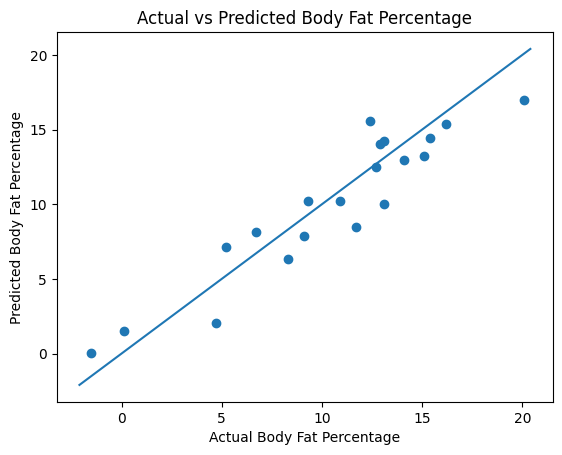

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Body Fat Percentage")
plt.ylabel("Predicted Body Fat Percentage")
plt.title("Actual vs Predicted Body Fat Percentage")

plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()]
)

plt.show()


In [9]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,Age,0.269294
1,Daily_calorie_intake,0.004135
2,Sleep_hours,-1.046953
3,Workout_sessions_per_week,-1.203266


## 10. Conclusion
The Linear Regression model predicts body fat percentage using lifestyle attributes. Workout frequency and calorie intake notably influence body fat levels.

## 11. Future Scope
- Use a larger real-world dataset
- Apply advanced regression techniques
- Improve prediction accuracy with feature scaling